## Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_FPT_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,38801.345107,39257.235584,38548.072619,38750.690609,NaN,NaN,1801400
2021-03-16,39003.963097,41283.415486,38801.345107,41030.142998,NaN,NaN,5171000
2021-03-17,41283.415486,41283.415486,40523.598023,40928.834003,NaN,NaN,2573500
2021-03-18,41030.142998,41030.142998,40523.598023,41030.142998,NaN,NaN,2177500
2021-03-19,40523.598023,40776.870510,40219.671037,40422.289028,NaN,NaN,2923500


In [3]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_FPT_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,6.478973e+12,2.086993e+12,26.886181,1418.691415,0.0424,0.2866,1.0117,1.988404,0.252270,20300.156504
Q3/2024,6.158956e+12,2.088852e+12,27.016817,1419.955116,0.0368,0.2816,0.9110,2.097673,0.239378,20184.500524
Q2/2024,5.651357e+12,1.875159e+12,24.724594,1283.961280,0.0804,0.2796,0.9943,2.005734,0.239496,18820.482952
Q1/2024,5.510466e+12,1.798031e+12,20.588714,1231.150155,0.0469,0.2770,0.9549,2.047182,0.230371,18374.065310
Q4/2023,5.631864e+12,1.728400e+12,19.319241,1360.978206,0.1046,0.2819,1.0143,1.985892,0.239965,19677.773956


In [4]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [5]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,149260.000000,2024-12-31
Q3/2024,134159.027154,2024-09-30
Q2/2024,131825.076225,2024-06-30
Q1/2024,98406.148219,2024-03-31
Q4/2023,82193.955805,2023-12-31


In [6]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,2.894527e+12,9.061427e+11,16.531037,998.538141,0.0477,0.2482,1.2541,1.797378,0.175968,18334.379041,40156.955945,NaN,NaN
Q2/2021,3.440181e+12,1.000031e+12,18.294494,1101.999931,-0.0169,0.2535,1.3423,1.744997,0.188983,18498.562322,51186.021001,11029.065056,0.274649
Q3/2021,3.250929e+12,1.124839e+12,22.057422,1239.421182,0.0460,0.2617,1.3738,1.727922,0.183253,18713.571579,56491.780683,5305.759682,0.103656
Q4/2021,4.094368e+12,1.301522e+12,21.794512,1434.102518,0.1514,0.2671,1.5068,1.663647,0.210004,19770.511694,55527.497568,-964.283115,-0.017069
Q1/2022,3.953321e+12,1.238879e+12,19.313467,1129.306670,0.1310,0.2686,1.4217,1.703372,0.178050,17487.068514,62114.900873,6587.403305,0.118633


## Phân tích dữ liệu

In [7]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,2.894527e+12,9.061427e+11,16.531037,998.538141,0.0477,0.2482,1.2541,1.797378,0.175968,18334.379041,40156.955945,NaN,NaN
Q2/2021,3.440181e+12,1.000031e+12,18.294494,1101.999931,-0.0169,0.2535,1.3423,1.744997,0.188983,18498.562322,51186.021001,11029.065056,0.274649
Q3/2021,3.250929e+12,1.124839e+12,22.057422,1239.421182,0.0460,0.2617,1.3738,1.727922,0.183253,18713.571579,56491.780683,5305.759682,0.103656
Q4/2021,4.094368e+12,1.301522e+12,21.794512,1434.102518,0.1514,0.2671,1.5068,1.663647,0.210004,19770.511694,55527.497568,-964.283115,-0.017069
Q1/2022,3.953321e+12,1.238879e+12,19.313467,1129.306670,0.1310,0.2686,1.4217,1.703372,0.178050,17487.068514,62114.900873,6587.403305,0.118633


### Thống kê mô tả

In [8]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |         gross_profit |           net_income |    pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|---------------------:|---------------------:|------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |                16.00 |                16.00 | 16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  | 4,700,403,873,715.25 | 1,496,694,336,845.88 | 20.23 | 1,253.10 |         0.05 |  0.27 |       1.17 |            1.88 |             0.21 |    18,794.49 |   77,516.32 |       7,273.54 |         0.10 |
| std   | 1,076,864,354,260.16 |   362,168,479,158.60 |  3.57 |   128.14 |         0.06 |  0.01 |       0.20 |            0.15 |             0.03 |       845.83 |  

In [9]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                             Variance |
|:---------------|-------------------------------------:|
| gross_profit   | 1,159,636,837,476,154,841,497,600.00 |
| net_income     |   131,166,007,296,056,103,010,304.00 |
| pe             |                                12.72 |
| eps            |                            16,421.03 |
| eps_growth     |                                 0.00 |
| roe            |                                 0.00 |
| de_ratio       |                                 0.04 |
| current_ratio  |                                 0.02 |
| asset_turnover |                                 0.00 |
| book_value     |                           715,434.31 |
| close_avg      |                     1,112,654,474.52 |
| price_change   |                       100,400,082.92 |
| pct_change     |                                 0.02 |


### Vẽ biểu đồ biến động 

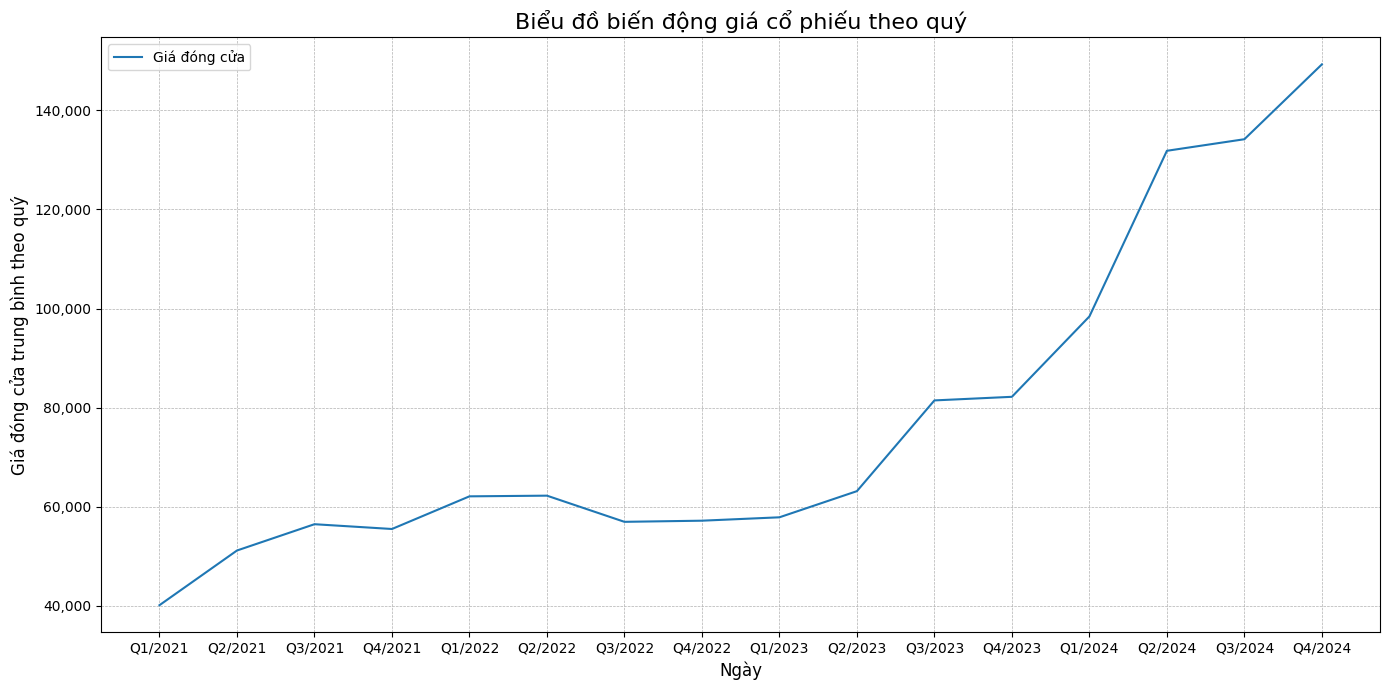

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

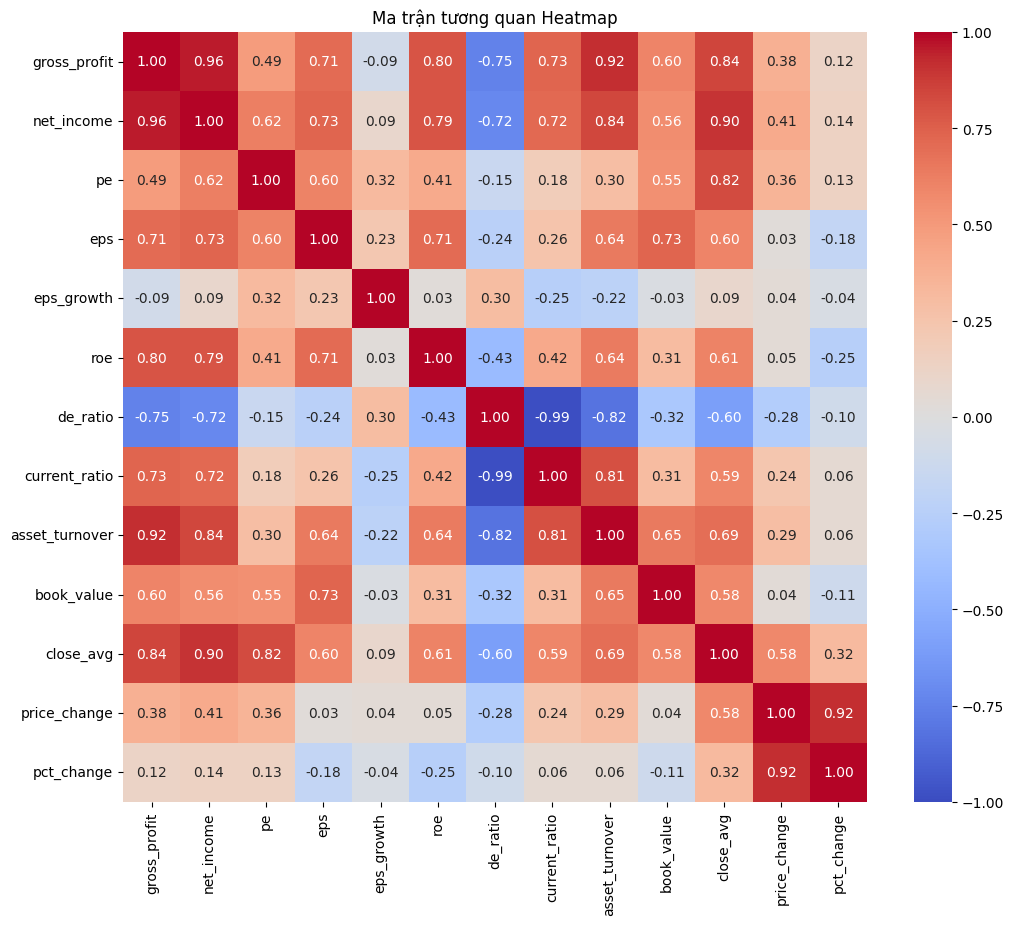

In [11]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [12]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
net_income        0.902095
gross_profit      0.844289
pe                0.822593
asset_turnover    0.689207
roe               0.608152
eps               0.597801
current_ratio     0.592545
price_change      0.584883
book_value        0.579691
pct_change        0.315548
eps_growth        0.090649
de_ratio         -0.595096
Name: close_avg, dtype: float64

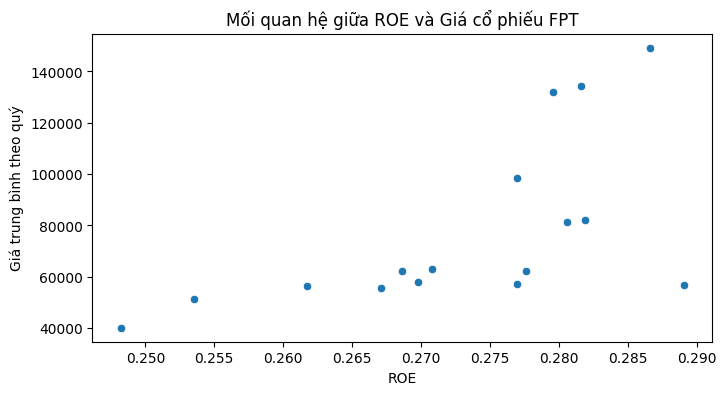

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu FPT')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()